<a href="https://colab.research.google.com/github/sumitt1/pythonall/blob/master/temp_forecast_timeseries_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

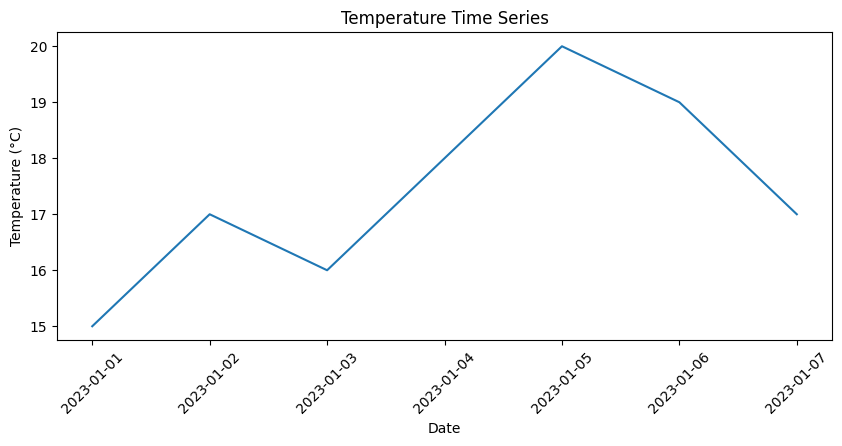

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


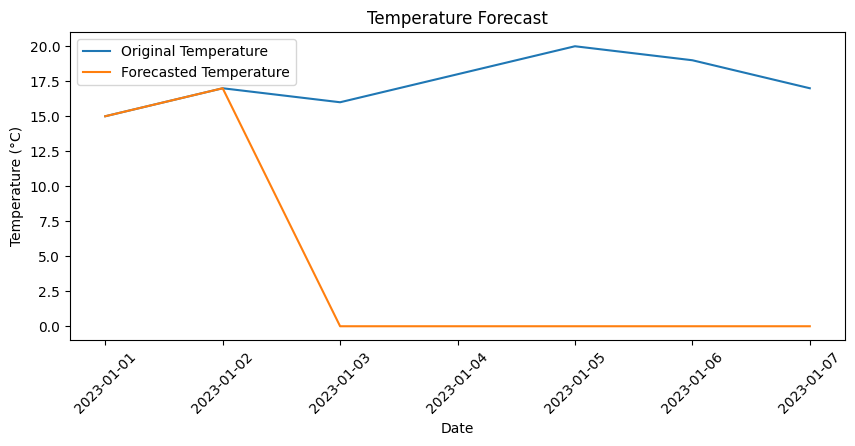

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Manually enter temperature data
dates = ['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05', '2023-01-06', '2023-01-07']
temperatures = [15, 17, 16, 18, 20, 19, 17]

# Plot the original temperature time series
plt.figure(figsize=(10, 4))
plt.plot(dates, temperatures)
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Time Series')
plt.xticks(rotation=45)
plt.show()

# Perform Fourier analysis using trigonometric functions
fourier_transform = np.fft.fft(temperatures)
power_spectrum = np.abs(fourier_transform) ** 2
frequencies = np.fft.fftfreq(len(temperatures))

# Identify dominant frequencies and their amplitudes
dominant_indices = np.where(power_spectrum > np.mean(power_spectrum))
dominant_frequencies = frequencies[dominant_indices]
dominant_amplitudes = power_spectrum[dominant_indices]

# Sort the dominant frequencies by amplitude in descending order
sorted_indices = np.argsort(dominant_amplitudes)[::-1]
sorted_frequencies = dominant_frequencies[sorted_indices]

# Choose the top K dominant frequencies to forecast the temperature
K = 2
forecasted_temperature = np.fft.ifft(fourier_transform)
forecasted_temperature[K:] = 0

# Plot the forecasted temperature time series
plt.figure(figsize=(10, 4))
plt.plot(dates, temperatures, label='Original Temperature')
plt.plot(dates, forecasted_temperature, label='Forecasted Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Forecast')
plt.xticks(rotation=45)
plt.legend()
plt.show()
